The following walks through the basic usage of a class we built `Evaluator` which wraps all of the important mmdetection functions (see `utils.py` for implementation details).  This will allow you to load our trained model and run that model over any image.

In [1]:
from utils import *

The first step is set the correct paths.  Make sure you have the data downloaded.  For the purposes of this tutorial, we will follow the file structure found at `csfg-algonquin.concordia.ca/~hallett/candescence/` (where you can also download the data).  We will assume you have the data downloaded into a folder called `candescence`.

The first path to set is the path to the config file used to train the model.  The config file contains all the parameters used for training the model, as well as additional architecture information.  For this tutorial, we will use the config file associated with our final model.  It can be found at `candescence/performance/exp27/training-of-model/exp27.py`

In [2]:
CONFIG_PATH = "/home/data/refined/candescence/production/models/tc_config.py"

Next, we need the path to the weights of the trained model.  It can be found at `candescence/performance/exp27/training-of-model/final.pth`

In [3]:
MODEL_PATH = "/home/data/refined/candescence/production/models/tc_model.pth"

In [4]:
print(CONFIG_PATH)

/home/data/refined/candescence/production/models/tc_config.py


In [5]:
print(MODEL_PATH)

/home/data/refined/candescence/production/models/tc_model.pth


With the paths set, we can now load our class `Evaluator` which stores all the relevant methods for inference and analysis. 

In [6]:
evaluator = Evaluator(CONFIG_PATH, MODEL_PATH)

The evaluator has two methods.

The first method is `draw_dts(filename,threshold)`.  It takes as arguments the path to an image file and a confidence threshold (ie, a value between 0 and 1), and returns the image with the model's predicted bounding boxes drawn on.

The second method is `get_dts(filename,class)`.  It takes as arguments the path to an image file, and a class name.  This will return an array of all the detected bounding boxes of the specifed class, ranked by confidence level.

In [7]:
CLASS_NAMES = ["Yeast White", "Budding White", "Yeast Opaque","Budding Opaque","Yeast Gray", "Budding Gray",
                            "Shmoo","Artifact", "Unknown ","Pseudohyphae", "Hyphae", "H-junction",
                           "P-junction","P-Start","H-Start"]

Here's an example of the `draw_dts` method applied to an image from our validation set.

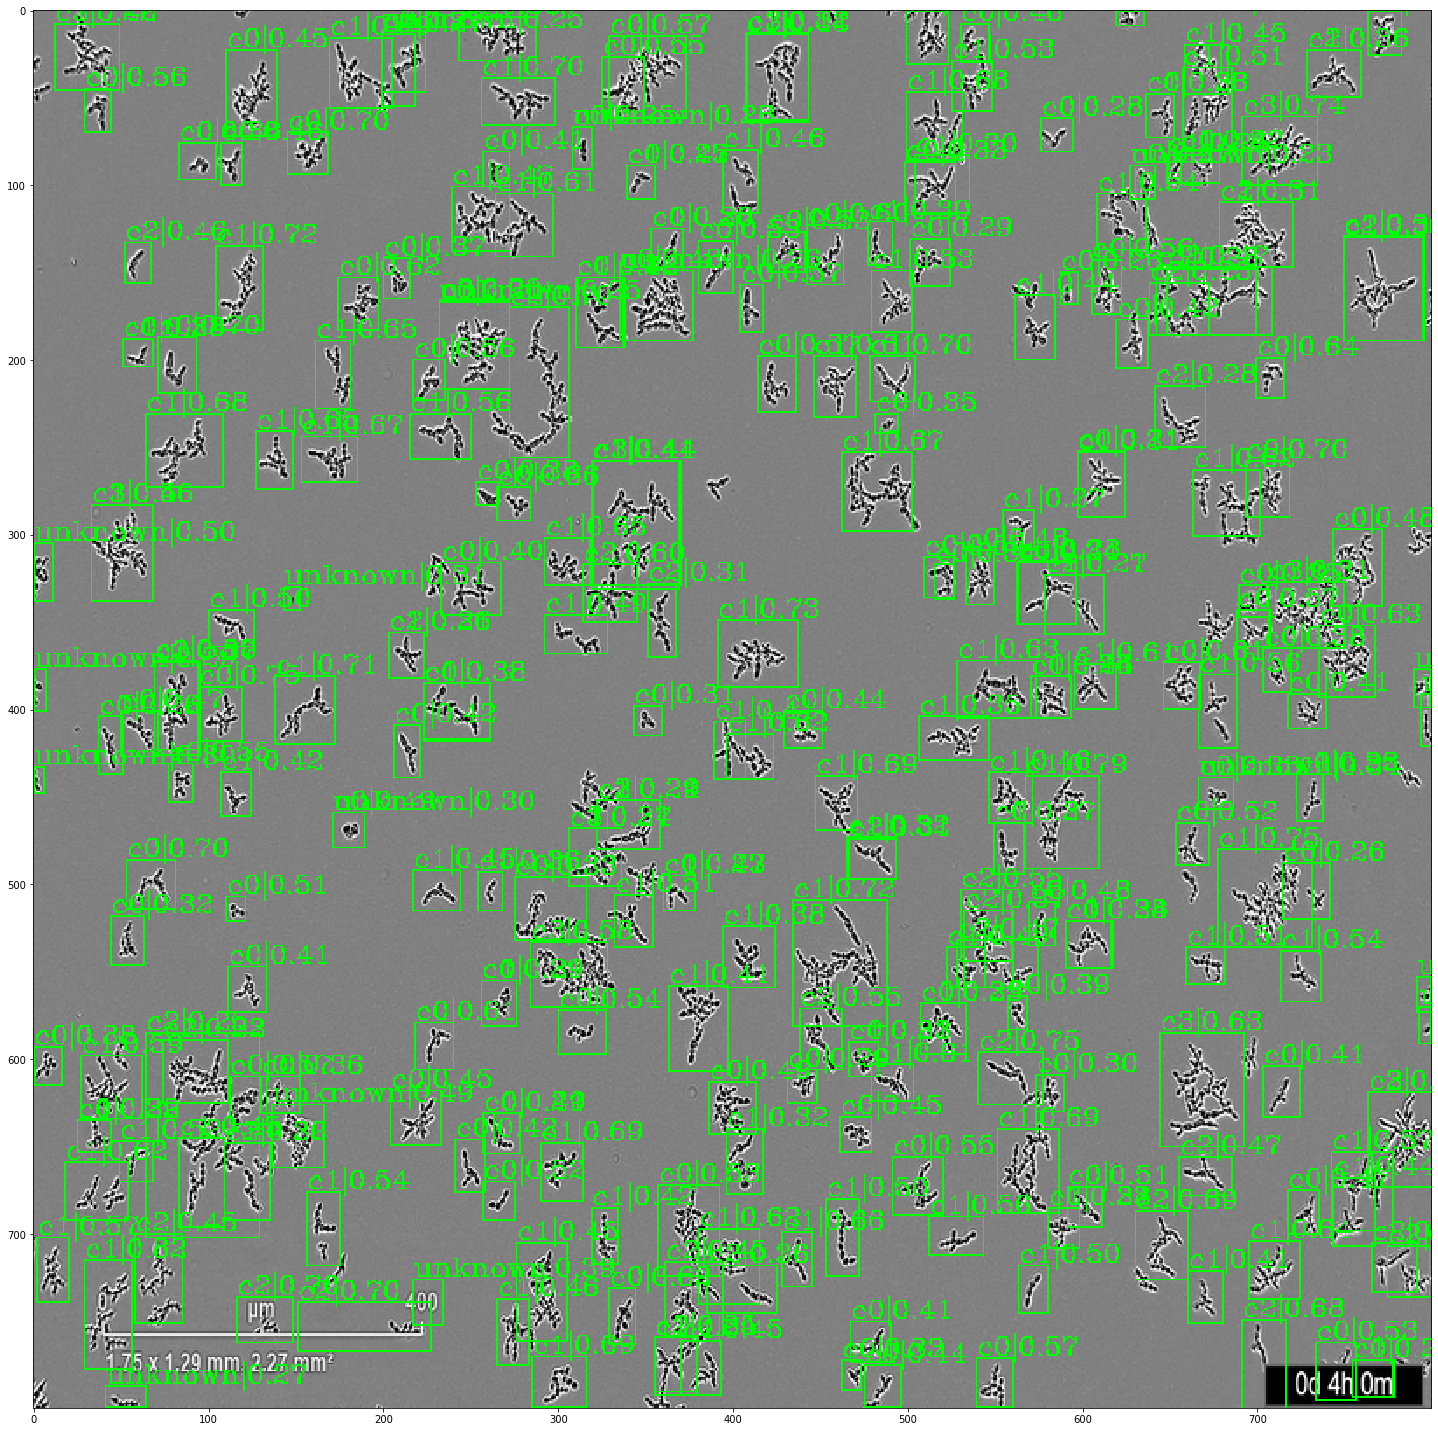

In [24]:
evaluator.draw_dts("/home/data/refined/candescence/guelph/incucyte/0-image-modification/0.1-converted-bmp/YPD_A1_1_2022y03m03d_19h52m.bmp", 0.2)

The `get_dts` method is useful when you don't know what confidence level to choose, as it returns all bounding boxes for a specified class.  For instance, here's an example that returns all possible detections for the class `Budding White` on the validation image above.

In [16]:
evaluator.get_dts("/home/data/refined/candescence/guelph/incucyte/0-image-modification/0.1-converted-bmp/YPD_A5_1_2022y03m03d_19h52m.bmp","Budding White")

array([[6.73190735e+02, 2.05958466e+02, 7.09535950e+02, 2.53977570e+02,
        7.89520919e-01],
       [2.14289001e+02, 4.02198669e+02, 2.39552460e+02, 4.47810486e+02,
        7.41374731e-01],
       [3.67449524e+02, 2.74312500e+02, 4.04618073e+02, 3.22688904e+02,
        7.35532224e-01],
       [4.81995605e+02, 1.48997330e+02, 5.27280945e+02, 1.94125305e+02,
        7.05954134e-01],
       [5.58014648e+02, 6.32136688e+01, 5.92505127e+02, 1.05898712e+02,
        6.94691360e-01],
       [3.07000458e+02, 2.23501846e+02, 3.44299500e+02, 2.63246216e+02,
        6.93047225e-01],
       [2.38509178e+00, 7.19887695e+02, 4.61533890e+01, 7.67171936e+02,
        6.30391061e-01],
       [2.66293488e+02, 6.66962952e+02, 2.94893005e+02, 7.11549316e+02,
        6.26627207e-01],
       [6.10588562e+02, 2.88696381e+02, 6.37447693e+02, 3.37727264e+02,
        6.20558739e-01],
       [4.94474823e+02, 3.16353607e+02, 5.10228149e+02, 3.46896851e+02,
        6.13352418e-01],
       [6.15912354e+02, 4.7034

There may be cases where you have a large number of images to run validation over.  For  hose cases, the following function will be useful.  It takes an `Evaluator` class, an array of filenames as input, and a confidence threshold.  It returns a figure of all the images, along with their corresponding predicted bounding boxes. 

In [21]:
import matplotlib.pyplot as plt

def create_panel(filenames,evaluator,threshold,figure_name):
    fig = plt.figure(figsize=(50,50))
    c = 1
    
    for i in filenames:
        new_image = draw_dts(i,threshold,show=False)
        ax1 = fig.add_subplot(15,15,c)
        ax1.imshow(new_image)
        c += 1
        
    plt.savefig(figure_name) 

As an example, here's the above function run using all of our validation images.

In [22]:
import os

validation_filenames = os.listdir("/home/data/refined/candescence/guelph/incucyte/0-image-modification/0.1-converted-bmp")


create_panel(validation_filenames,evaluator,0.3,"incucyte_trial1.png")

NameError: name 'draw_dts' is not defined

<Figure size 3600x3600 with 0 Axes>